# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [3]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define batch size for data loaders
batch_size=32

# Transforms
transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.1307,),(0.3081,)),])

# Training set and define training dataloader
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)

# Test set and define test dataloader
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)

# Split the training dataset into training and validation sets
# We will use 80% for training and 20% for validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, validation_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

#Train dataloader
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

# Test dataloader
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Validation dataloader
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=True)



Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

1. **Batch_size**: Batch size refers to the number of samples that will be processed by the model in one forward/backward pass. A smaller batch size consumes less memory but may slow down training, while a larger batch size may require more memory but can speed up training. The chosen batch size of 32 is a common value that balances memory efficiency and training speed for many models.

2. **Data Transformations**: The transforms.Compose function allows you to chain multiple data transformations together. In this case, two transformations are applied to the data:

**transforms.ToTensor()**: Converts the data from PIL images (in the range [0, 255]) to PyTorch tensors (in the range [0, 1]).

**transforms.Normalize((0.1307,), (0.3081,))**: Applies mean and standard deviation normalization to the tensor data. These specific values (mean=0.1307 and std=0.3081) are the mean and standard deviation of the MNIST dataset and are commonly used for normalization. 

2. **Normalize()**: Normalization is a common preprocessing step used to scale the pixel values of images. In this case, the transform applies mean and standard deviation normalization. The reason for choosing this normalization is that the mean and standard deviation values (0.1307 and 0.3081, respectively) are specific to the MNIST dataset. Normalization helps in bringing all pixel values within a similar range, which can lead to faster convergence during training and more stable training behavior. It also helps prevent issues related to exploding or vanishing gradients.

3. **(0.1307,)** and **(0.3081,)**: The first tuple contains the mean value (0.1307) and the second tuple contains the standard deviation value (0.3081). These values have been precomputed for the MNIST dataset. By subtracting the mean and dividing by the standard deviation for each pixel, the pixel values will be approximately centered around zero with a standard deviation of one. This normalization ensures that the pixel values are roughly in the range [-1, 1], which is desirable for many neural network architectures.

4. **Compose()**: Using `transforms.Compose`, you can combine multiple transformations into a single transform. This allows you to apply a sequence of transformations to the input data conveniently and consistently.



### Training Set and Training DataLoader:

**train_dataset**: Loads the training set of the MNIST dataset and applies the specified transformations using torchvision's datasets.MNIST class.

**train_loader**: Creates a data loader for the training set. The data loader allows efficient batching, shuffling, and parallel data loading during training. It will shuffle the data (shuffle=True) to introduce randomness during training and avoid overfitting.

### Test Set and Test DataLoader:

**test_dataset**: Loads the test set of the MNIST dataset and applies the same transformations as for the training set.

**test_loader**: Creates a data loader for the test set. The test loader does not shuffle the data (shuffle=False) as we want to evaluate the model's performance on the test set without introducing randomness.
Validation Set and Validation DataLoader:

The training dataset is split into training and validation sets using torch.utils.data.random_split.

**train_dataset**: Now contains the training set (80% of the original training data).

**validation_dataset**: Contains the validation set (20% of the original training data).

**validation_loader**: Creates a data loader for the validation set. Similar to the training loader, it shuffles the data (shuffle=True) to introduce randomness during validation.

In summary, the given transform is suitable for preprocessing the MNIST dataset. It converts the images to tensors and applies normalization, which helps in preparing the data for efficient and stable training of neural network models. It is particularly effective for grayscale images like those in the MNIST dataset.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
train_dataset

In [7]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Train DataLoader Normalized
8


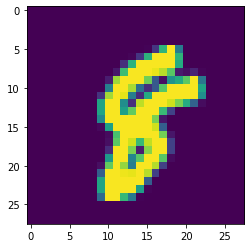

4


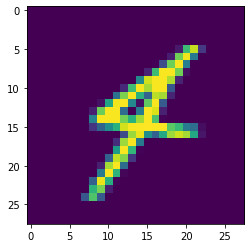

7


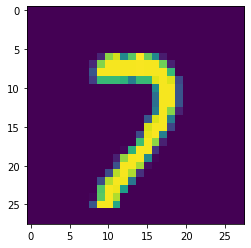

1


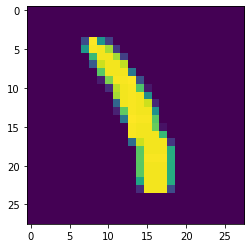

7


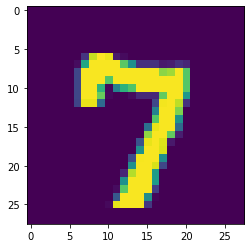

Test DataLoader Normalized
7


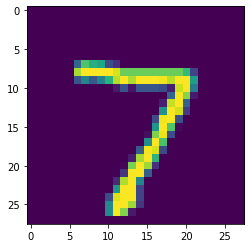

2


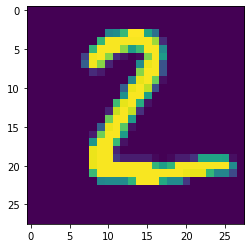

1


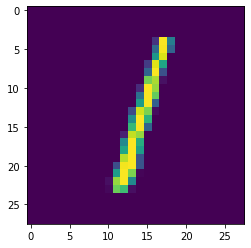

0


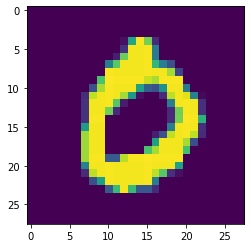

4


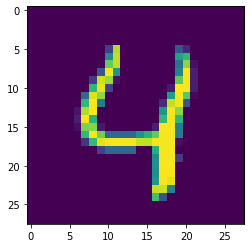

In [8]:
# Explore data
print('Train DataLoader Normalized')
show5(train_loader)
print('Test DataLoader Normalized')
show5(test_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [9]:
# Class for the neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Convolutional layers: input channels = 1 (grayscale image), output channels = 8, kernel size = 3x3, padding = 1, stride = 1
        # Dropout2d with a dropout rate of 40% to prevent overfitting
        # MaxPool2d with a kernel size = 2x2 and stride = 2 to downsample the feature maps
        # Second Convolutional layer: input channels = 8, output channels = 16, kernel size = 3x3, padding = 1, stride = 1
        # Dropout2d with a dropout rate of 20%
        self.Convolutional_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1, stride=1),
            nn.Dropout2d(0.4),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1, stride=1),
            nn.Dropout2d(0.2)
        )
        
        # Linear layers: The output of the convolutional layers will be flattened to a 1D vector and fed into these fully connected layers
        self.Linear_layers = nn.Sequential(
            nn.Linear(16 * 14 * 14, 784),    # First linear layer: input size = 16 * 14 * 14 (output channels * height * width of the feature maps), output size = 784
            nn.ReLU(),            # ReLU activation function to introduce non-linearity
            nn.Dropout(0.6),      # Dropout with a dropout rate of 60% to prevent overfitting
            nn.Linear(784, 196),  # Second linear layer: input size = 784, output size = 196
            nn.ReLU(),            # ReLU activation function
            nn.Dropout(0.3),      # Dropout with a dropout rate of 30%
            nn.Linear(196, 49),   # Third linear layer: input size = 196, output size = 49
            nn.ReLU(),            # ReLU activation function
            nn.Dropout(0.15),     # Dropout with a dropout rate of 15%
            nn.Linear(49, 10)     # Fourth linear layer (output layer): input size = 49, output size = 10 (number of classes)
        )

    def forward(self, x):
        # Forward pass through the network
        x = self.Convolutional_layers(x)  # Pass through the convolutional layers
        x = torch.flatten(x, 1)  # Flatten the tensor into a 1D vector (except for the batch dimension)
        x = self.Linear_layers(x)  # Pass through the linear layers
        return x

# Instantiate the net
net = Net()
net.to(device)  # Move the model to device for computation


Net(
  (Convolutional_layers): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Dropout2d(p=0.4, inplace=False)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): Dropout2d(p=0.2, inplace=False)
  )
  (Linear_layers): Sequential(
    (0): Linear(in_features=3136, out_features=784, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.6, inplace=False)
    (3): Linear(in_features=784, out_features=196, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=196, out_features=49, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.15, inplace=False)
    (9): Linear(in_features=49, out_features=10, bias=True)
  )
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
# Optimizer
optimizer = optim.Adam(net.parameters(),lr=0.001)

# Loss function
criterion = nn.CrossEntropyLoss()
criterion.to(device)

CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [11]:
epochs = 10  # The total number of iterations (epochs)

train_losses = []         # List to store training losses for each epoch
validation_losses = []    # List to store validation losses for each epoch

# Loop through each epoch
for epoch in range(epochs):
    # Prepare the network for training
    net.train()
    train_loss = 0.0

    # Loop through the training data
    for idx, (images, labels) in enumerate(train_loader): 
        # Send the data to the GPU (if available) for faster computation
        images = images.to(device)
        labels = labels.to(device)

        # Training pass
        optimizer.zero_grad()   # Clear accumulated gradients from previous iteration

        # Forward pass
        output = net(images)    # Feed input images through the neural network
        loss = criterion(output, labels)  # Calculate the loss (difference between predicted and actual labels)

        # Backward pass (gradient computation)
        loss.backward()         # Calculate gradients of the loss with respect to network parameters
        optimizer.step()        # Update network parameters using the computed gradients

        train_loss += loss.item()  # Accumulate the training loss for this iteration
        
    # Prepare the network for evaluation (validation)
    net.eval() 
    validation_loss = 0.0
    accuracy = 0

    # Turn off gradients when performing validation to save memory and speed up computation
    with torch.no_grad():
        for images, labels in validation_loader:
            images = images.to(device)
            labels = labels.to(device)

            output = net(images)  # Forward pass for validation data
            validation_loss += criterion(output, labels)  # Accumulate the validation loss

            top_prob, top_class = output.topk(1, dim=1)  # Get the predicted classes
            predictions = top_class == labels.view(*top_class.shape)  # Compare predictions with actual labels
            accuracy += torch.mean(predictions.type(torch.FloatTensor))  # Calculate the accuracy

    # Store the average training loss and validation loss for this epoch
    train_losses.append(train_loss / len(train_loader))
    validation_losses.append(validation_loss / len(validation_loader))

    # Print the results for this epoch
    print("Epoch: {}/{}  ".format(epoch + 1, epochs),
          "Training loss: {:.4f}  ".format(train_loss / len(train_loader)),
          "Validation loss: {:.4f}  ".format(validation_loss / len(validation_loader)),
          "Validation accuracy: {:.4f}  ".format(accuracy / len(validation_loader)))


Epoch: 1/10   Training loss: 0.4691   Validation loss: 0.1588   Validation accuracy: 0.9532  
Epoch: 2/10   Training loss: 0.2624   Validation loss: 0.1265   Validation accuracy: 0.9643  
Epoch: 3/10   Training loss: 0.2215   Validation loss: 0.1084   Validation accuracy: 0.9679  
Epoch: 4/10   Training loss: 0.1945   Validation loss: 0.1027   Validation accuracy: 0.9707  
Epoch: 5/10   Training loss: 0.1802   Validation loss: 0.0982   Validation accuracy: 0.9736  
Epoch: 6/10   Training loss: 0.1665   Validation loss: 0.0962   Validation accuracy: 0.9737  
Epoch: 7/10   Training loss: 0.1547   Validation loss: 0.0843   Validation accuracy: 0.9762  
Epoch: 8/10   Training loss: 0.1512   Validation loss: 0.0970   Validation accuracy: 0.9756  
Epoch: 9/10   Training loss: 0.1416   Validation loss: 0.0865   Validation accuracy: 0.9766  
Epoch: 10/10   Training loss: 0.1347   Validation loss: 0.0838   Validation accuracy: 0.9776  


Plot the training loss (and validation loss/accuracy, if recorded).

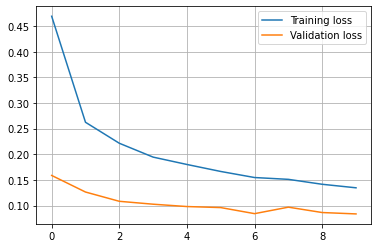

In [12]:
# Convert the training and validation losses to PyTorch tensors and move them to the CPU (if they were on the GPU)
train_losses = torch.Tensor(train_losses).cpu()
validation_losses = torch.Tensor(validation_losses).cpu()

# Plot the training and validation losses
plt.plot(train_losses, label='Training loss')       # Plot the training loss curve
plt.plot(validation_losses, label='Validation loss')  # Plot the validation loss curve
plt.legend() 
plt.grid();

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [13]:
# Set the network in evaluation mode.
# This is important because some layers, like BatchNorm and Dropout, behave differently during training and evaluation.
net.eval()

test_loss = 0.0
accuracy = 0

# Turning off the gradients when performing validation/testing.
# This saves memory and speeds up the computation.
# Gradients are not needed for testing, as we are not updating the model's parameters.
with torch.no_grad():
    for images, labels in test_loader:

        images = images.to(device)
        labels = labels.to(device)

        # Forward pass for test data
        output = net(images)

        # Compute the test loss
        test_loss += criterion(output, labels)

        # Calculate the accuracy for this batch
        top_prob, top_class = output.topk(1, dim=1)
        predictions = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(predictions.type(torch.FloatTensor))

# Print the testing loss and accuracy
print("Testing loss: {:.4f}  ".format(test_loss/len(test_loader)),
      "Test accuracy: {:.4f}  ".format(accuracy/len(test_loader)))


Testing loss: 0.0717   Test accuracy: 0.9784  


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [14]:
# Improved model architecture with BatchNorm and Dropout
class ImprovedNet(nn.Module):
    def __init__(self):
        super(ImprovedNet, self).__init__()
        self.Convolutional_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1, stride=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.Linear_layers = nn.Sequential(
            nn.Linear(32 * 7 * 7, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.Convolutional_layers(x)
        x = torch.flatten(x, 1)
        x = self.Linear_layers(x)
        return x

# Instantiate the improved net
net_tuned = ImprovedNet()
net_tuned.to(device)

ImprovedNet(
  (Convolutional_layers): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Linear_layers): Sequential(
    (0): Linear(in_features=1568, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [15]:
# Loss function and optimizer
criterion_tuned = nn.CrossEntropyLoss()
optimizer_tuned = optim.Adam(net_tuned.parameters(), lr=0.001, weight_decay=1e-5)
criterion_tuned.to(device)
# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer_tuned, step_size=5, gamma=0.5)

In [16]:
epochs = 10 # The total number of iterations

train_losses_tuned = []
validation_losses_tuned = []

for epoch in range(epochs):
    # prep net_tuned for training
    net_tuned.train()
    train_loss = 0.0

    for idx, (images, labels) in enumerate(train_loader): 

        # Send these >>> To GPU
        images = images.to(device)
        labels = labels.to(device)

        # Training pass
        optimizer_tuned.zero_grad()

        # Forward pass
        output = net_tuned(images)
        loss = criterion_tuned(output, labels)

        #Backward pass
        loss.backward()
        optimizer_tuned.step()

        train_loss += loss.item()
        
    
    # prep net_tuned for evaluation
    net_tuned.eval() 
    validation_loss = 0.0
    accuracy = 0

    # Turning off the gradients when performing validation.
    # If we don't turn it off, we will comprise our net_tunedworks weight entirely
    with torch.no_grad():
        for images, labels in validation_loader:

            images = images.to(device)
            labels = labels.to(device)

            output = net_tuned(images) 
            validation_loss += criterion_tuned(output, labels)

            top_prob, top_class = output.topk(1, dim=1)
            predictions = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(predictions.type(torch.FloatTensor))

    train_losses_tuned.append(train_loss/len(train_loader))
    validation_losses_tuned.append(validation_loss/len(validation_loader))

    print("Epoch: {}/{}  ".format(epoch+1, epochs),
          "Training loss: {:.4f}  ".format(train_loss/len(train_loader)),
          "Validation loss: {:.4f}  ".format(validation_loss/len(validation_loader)),
          "Validation accuracy: {:.4f}  ".format(accuracy/len(validation_loader)))
    


Epoch: 1/10   Training loss: 0.2382   Validation loss: 0.0696   Validation accuracy: 0.9775  
Epoch: 2/10   Training loss: 0.1003   Validation loss: 0.0552   Validation accuracy: 0.9845  
Epoch: 3/10   Training loss: 0.0819   Validation loss: 0.0489   Validation accuracy: 0.9850  
Epoch: 4/10   Training loss: 0.0659   Validation loss: 0.0440   Validation accuracy: 0.9875  
Epoch: 5/10   Training loss: 0.0556   Validation loss: 0.0442   Validation accuracy: 0.9872  
Epoch: 6/10   Training loss: 0.0526   Validation loss: 0.0403   Validation accuracy: 0.9892  
Epoch: 7/10   Training loss: 0.0455   Validation loss: 0.0379   Validation accuracy: 0.9897  
Epoch: 8/10   Training loss: 0.0428   Validation loss: 0.0385   Validation accuracy: 0.9898  
Epoch: 9/10   Training loss: 0.0364   Validation loss: 0.0448   Validation accuracy: 0.9890  
Epoch: 10/10   Training loss: 0.0337   Validation loss: 0.0402   Validation accuracy: 0.9902  


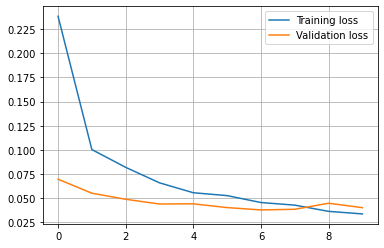

In [19]:
# Convert the training and validation losses to PyTorch tensors and move them to the CPU (if they were on the GPU)
train_losses_tuned = torch.Tensor(train_losses_tuned).cpu()
validation_losses_tuned = torch.Tensor(validation_losses_tuned).cpu()

# Plot the training and validation losses
plt.plot(train_losses_tuned, label='Training loss')       # Plot the training loss curve
plt.plot(validation_losses_tuned, label='Validation loss')  # Plot the validation loss curve
plt.legend() 
plt.grid();

In [20]:
net_tuned.eval() 
test_loss = 0.0
accuracy = 0

# Turning off the gradients when performing validation.
# If we don't turn it off, we will comprise our networks weight entirely
with torch.no_grad():
    for images, labels in test_loader:

        images = images.to(device)
        labels = labels.to(device)

        output = net_tuned(images)
        test_loss += criterion_tuned(output, labels)

        top_prob, top_class = output.topk(1, dim=1)
        predictions = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(predictions.type(torch.FloatTensor))

print("Testing loss: {:.4f}  ".format(test_loss/len(test_loader)),
      "Test accuracy: {:.4f}  ".format(accuracy/len(test_loader)))

Testing loss: 0.0298   Test accuracy: 0.9920  


## Saving your model
Using `torch.save`, save your model for future loading.

In [21]:
torch.save(net.state_dict(),'handwritten_digit_classifier_with_PyTorch.pth')
torch.save(net_tuned.state_dict(),'handwritten_digit_classfier_with_PyTorch_tuned.pth')